In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop = pd.read_csv('D:/crop/Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
crop.shape

(2200, 8)

In [5]:
crop.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [6]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
crop.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [8]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
crop['temperature'].value_counts()

20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: temperature, Length: 2200, dtype: int64

In [10]:
len(crop['temperature'].value_counts())

2200

In [11]:
crop['humidity'].value_counts()

82.002744    1
90.336987    1
93.907412    1
91.473558    1
94.037115    1
            ..
66.637972    1
61.532786    1
61.692951    1
69.090478    1
60.396475    1
Name: humidity, Length: 2200, dtype: int64

In [12]:
len(crop['humidity'].value_counts())

2200

In [13]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [14]:
crop.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [15]:
'''Khan Idris17:58
# fit the train model with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
Khan Idris18:04
n_estimators: no of trees'''

'Khan Idris17:58\n# fit the train model with Random Forest Classifier\nfrom sklearn.ensemble import RandomForestClassifier\n\nRF = RandomForestClassifier(n_estimators=20, random_state=0)\nRF.fit(Xtrain,Ytrain)\nKhan Idris18:04\nn_estimators: no of trees'

In [16]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [17]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [18]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'temperature')

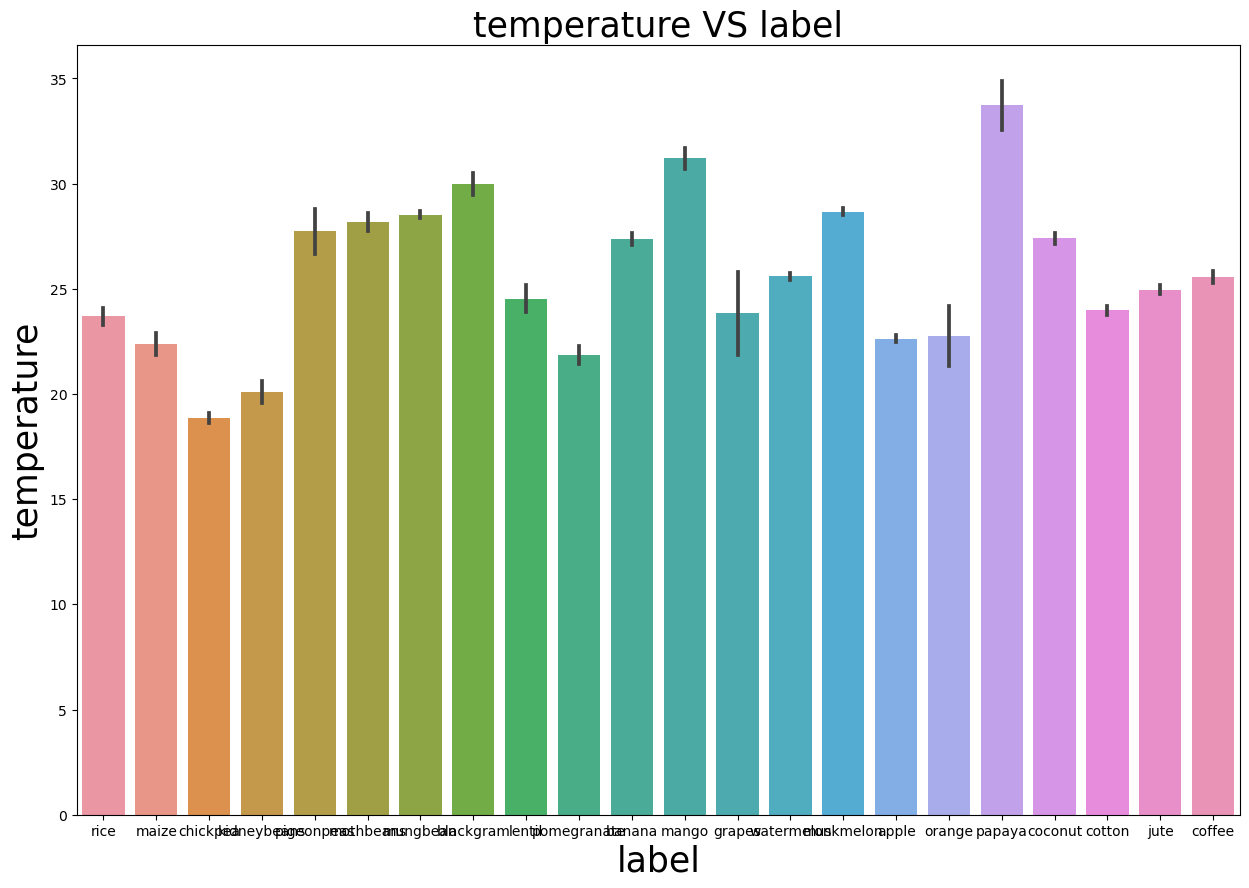

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(crop['label'],crop['temperature'])
plt.title('temperature VS label' ,fontsize=25)
plt.xlabel('label',fontsize=25)
plt.ylabel('temperature',fontsize = 25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'humidity')

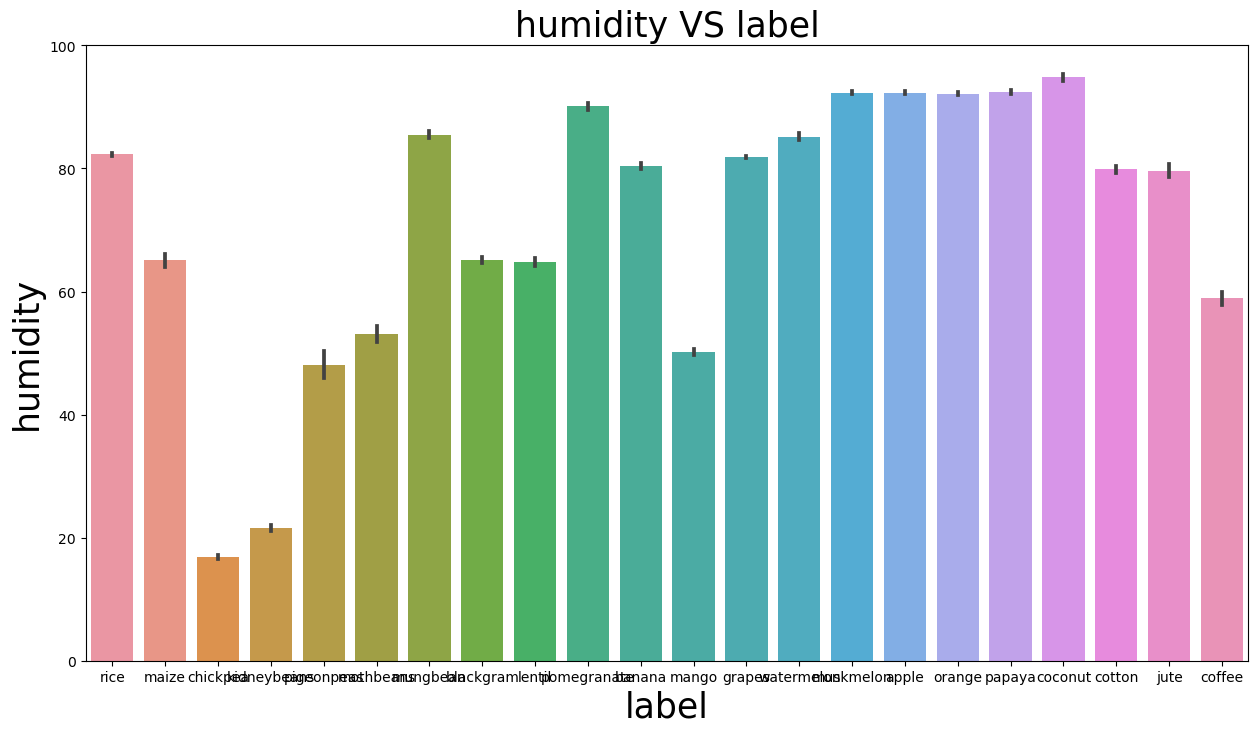

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(crop['label'],crop['humidity'])
plt.title('humidity VS label' ,fontsize=25)
plt.xlabel('label',fontsize=25)
plt.ylabel('humidity',fontsize = 25)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [22]:
sns.heatmap(crop, annot =False, vmin = -1, vmax = 1, cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: 'rice'

In [ ]:
fig1, ax1= plt.subplots()
colors=['gold', 'lightskyblue']
ax1.pie(crop, labels='temperature', autopct='1%.1f%%', shadow=True, startangle=90, colors=colors)
plt.show()

In [23]:
df = pd.read_csv('D:/crop/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [24]:
print(pd.isnull(df).sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label'],axis=1), 
                                                    df['label'], test_size=0.20, 
                                                    random_state=8)

In [26]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
predictions = logmodel.predict(X_test)
X_test.head()

,N,P,K,temperature,humidity,ph,rainfall
865,12,67,23,25.628962,63.149098,6.585020,45.496840
580,20,45,16,29.939649,54.618135,4.626212,45.436699
1947,108,38,24,23.410225,76.438370,7.442217,78.821996
462,35,80,25,28.092690,44.933220,4.895927,197.114401
1956,133,57,19,23.542347,75.982033,7.947011,84.125367


In [28]:
accuracy=logmodel.score(X_test,y_test)
print(accuracy*100,'%')

97.04545454545455 %


In [29]:
predictions

array(['lentil', 'mothbeans', 'cotton', 'pigeonpeas', 'cotton',
       'pomegranate', 'jute', 'papaya', 'muskmelon', 'coffee', 'chickpea',
       'lentil', 'banana', 'maize', 'mungbean', 'mothbeans', 'cotton',
       'watermelon', 'jute', 'chickpea', 'blackgram', 'rice', 'mango',
       'banana', 'pomegranate', 'coconut', 'maize', 'coconut',
       'kidneybeans', 'pigeonpeas', 'lentil', 'grapes', 'coffee', 'mango',
       'mungbean', 'coconut', 'blackgram', 'lentil', 'mungbean',
       'muskmelon', 'mango', 'cotton', 'orange', 'mothbeans',
       'kidneybeans', 'cotton', 'chickpea', 'jute', 'kidneybeans',
       'apple', 'pigeonpeas', 'mango', 'coffee', 'pigeonpeas',
       'kidneybeans', 'blackgram', 'mothbeans', 'banana', 'banana',
       'blackgram', 'banana', 'watermelon', 'lentil', 'pomegranate',
       'kidneybeans', 'muskmelon', 'mungbean', 'jute', 'papaya',
       'mungbean', 'rice', 'coffee', 'papaya', 'chickpea', 'kidneybeans',
       'orange', 'chickpea', 'muskmelon', 'pigeo

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.95      0.90        19
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        25
      cotton       0.85      1.00      0.92        23
      grapes       1.00      1.00      1.00        20
        jute       0.80      1.00      0.89        16
 kidneybeans       1.00      1.00      1.00        28
      lentil       1.00      0.96      0.98        23
       maize       1.00      0.84      0.91        25
       mango       1.00      1.00      1.00        14
   mothbeans       0.95      0.90      0.92        20
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00        19
      papaya       1.00    

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 28,  0,  0,

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [33]:
logmodel1 = SVC()
logmodel1.fit(X_train,y_train)

SVC()

In [34]:
SVC_prediction = logmodel1.predict(X_test)
X_test.head()

,N,P,K,temperature,humidity,ph,rainfall
865,12,67,23,25.628962,63.149098,6.585020,45.496840
580,20,45,16,29.939649,54.618135,4.626212,45.436699
1947,108,38,24,23.410225,76.438370,7.442217,78.821996
462,35,80,25,28.092690,44.933220,4.895927,197.114401
1956,133,57,19,23.542347,75.982033,7.947011,84.125367


In [35]:
SVC_accuracy=logmodel1.score(X_test,y_test)
print(accuracy*100,'%')

97.04545454545455 %


In [36]:
SVC_prediction

array(['lentil', 'mothbeans', 'cotton', 'pigeonpeas', 'cotton',
       'pomegranate', 'jute', 'papaya', 'muskmelon', 'coffee', 'chickpea',
       'lentil', 'banana', 'maize', 'mungbean', 'mothbeans', 'cotton',
       'watermelon', 'jute', 'chickpea', 'lentil', 'rice', 'mango',
       'banana', 'pomegranate', 'coconut', 'maize', 'coconut',
       'kidneybeans', 'pigeonpeas', 'lentil', 'grapes', 'coffee', 'mango',
       'mungbean', 'coconut', 'blackgram', 'lentil', 'mungbean',
       'muskmelon', 'mango', 'cotton', 'orange', 'mothbeans',
       'kidneybeans', 'maize', 'chickpea', 'jute', 'kidneybeans', 'apple',
       'pigeonpeas', 'mango', 'coffee', 'kidneybeans', 'kidneybeans',
       'blackgram', 'mothbeans', 'banana', 'banana', 'blackgram',
       'banana', 'watermelon', 'lentil', 'pomegranate', 'kidneybeans',
       'muskmelon', 'mungbean', 'jute', 'papaya', 'mungbean', 'jute',
       'coffee', 'papaya', 'chickpea', 'kidneybeans', 'orange',
       'chickpea', 'muskmelon', 'pigeonpe

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,SVC_prediction))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        18
   blackgram       0.95      1.00      0.97        19
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.96      0.98        25
      cotton       0.88      1.00      0.94        23
      grapes       1.00      1.00      1.00        20
        jute       0.70      1.00      0.82        16
 kidneybeans       0.97      1.00      0.98        28
      lentil       1.00      0.96      0.98        23
       maize       1.00      0.88      0.94        25
       mango       1.00      1.00      1.00        14
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00        19
      papaya       1.00    

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,SVC_prediction)

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 24,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 28,  0,  0,

In [39]:
#fit the train model with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
import warnings

In [40]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [41]:
n_estimators: 'no of trees'

In [44]:
y_pred = RF.predict(X_test)


In [47]:
accuracy=RF.score(X_test,y_pred)
print(accuracy*100,'%')

100.0 %
